In [1]:
from preprocess import *
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LSTM
from keras.utils import to_categorical
import wandb
from wandb.keras import WandbCallback
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
wandb.init()
config = wandb.config

config.max_len = 11
config.buckets = 20

# Save data to array file first
save_data_to_array(max_len=config.max_len, n_mfcc=config.buckets)

labels=["bus", "car_horn", "chainsaw", "cow", "engine", "footsteps", "hand_saw", "hen", "rooster", "siren"]

Failed to query for notebook name, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable
Saving vectors of label - 'siren': 100%|███████████████████████████████████████████████| 40/40 [00:00<00:00, 55.64it/s]


In [4]:
# Loading train/test set
X_train, X_test, y_train, y_test = get_train_test()

In [5]:
# Setting channels to 1 to generalize stereo sound to 1 channel
channels = 1
config.epochs = 50
config.batch_size = 100

# Number of classes
num_classes = 10

# Reshape X_train and X_test to include a 4th dimension (channels)
X_train = X_train.reshape(X_train.shape[0], config.buckets, config.max_len, channels)
X_test = X_test.reshape(X_test.shape[0], config.buckets, config.max_len, channels)

Failed to query for notebook name, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable


3.0


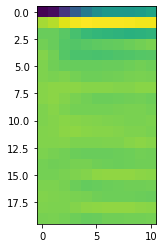

In [6]:
# Spectrogram visualized of 0th element
plt.imshow(X_train[1, :, :, 0])
print(y_train[1])

In [7]:
# Getting vector number where each number corresponds to a label
y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)

In [8]:
# Building the model
model = Sequential()

# Conv2D: 
#    Filters: 32
#    Kernel_size: (3,3) (height/width of the 2D convolution window)     
model.add(Conv2D(32, (3, 3),
    input_shape=(config.buckets, config.max_len, channels),
    activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [9]:
# Configure CNN for training
model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])

In [10]:
wandb.init()

# Train the CNN model
#    X_train: Input data
#    y_train_hot: Target data
model.fit(X_train, y_train_hot, epochs=config.epochs, validation_data=(X_test, y_test_hot), callbacks=[WandbCallback(data_type="image", labels=labels)])

Failed to query for notebook name, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable


Train on 281 samples, validate on 188 samples
Epoch 1/50
281/281 [==============================] - ETA: 2s - loss: 23.0465 - accuracy: 0.093 - ETA: 0s - loss: 16.3184 - accuracy: 0.085 - 0s 2ms/step - loss: 12.3469 - accuracy: 0.1530 - val_loss: 6.6698 - val_accuracy: 0.2766
Epoch 2/50
281/281 [==============================] - ETA: 0s - loss: 5.0918 - accuracy: 0.31 - ETA: 0s - loss: 4.7224 - accuracy: 0.26 - 0s 333us/step - loss: 4.5251 - accuracy: 0.2776 - val_loss: 3.5798 - val_accuracy: 0.3138
Epoch 3/50
281/281 [==============================] - ETA: 0s - loss: 2.9302 - accuracy: 0.37 - ETA: 0s - loss: 2.8241 - accuracy: 0.31 - 0s 325us/step - loss: 2.7315 - accuracy: 0.3203 - val_loss: 2.8565 - val_accuracy: 0.3032
Epoch 4/50
281/281 [==============================] - ETA: 0s - loss: 1.7559 - accuracy: 0.46 - ETA: 0s - loss: 1.7744 - accuracy: 0.48 - 0s 297us/step - loss: 1.7635 - accuracy: 0.4911 - val_loss: 2.7842 - val_accuracy: 0.3777
Epoch 5/50
281/281 [===================

281/281 [==============================] - ETA: 0s - loss: 0.0528 - accuracy: 1.00 - 0s 276us/step - loss: 0.0928 - accuracy: 0.9786 - val_loss: 3.4027 - val_accuracy: 0.3830
Epoch 38/50
281/281 [==============================] - ETA: 0s - loss: 0.0446 - accuracy: 1.00 - ETA: 0s - loss: 0.1070 - accuracy: 0.98 - 0s 527us/step - loss: 0.1131 - accuracy: 0.9858 - val_loss: 3.4673 - val_accuracy: 0.4043
Epoch 39/50
281/281 [==============================] - ETA: 0s - loss: 0.0330 - accuracy: 1.00 - ETA: 0s - loss: 0.0613 - accuracy: 0.99 - 0s 518us/step - loss: 0.0732 - accuracy: 0.9929 - val_loss: 3.5865 - val_accuracy: 0.3830
Epoch 40/50
281/281 [==============================] - ETA: 0s - loss: 0.0310 - accuracy: 1.00 - 0s 257us/step - loss: 0.0709 - accuracy: 0.9858 - val_loss: 3.4783 - val_accuracy: 0.3723
Epoch 41/50
281/281 [==============================] - ETA: 0s - loss: 0.2000 - accuracy: 0.96 - 0s 248us/step - loss: 0.0775 - accuracy: 0.9858 - val_loss: 3.5490 - val_accuracy: 

In [11]:
# Save the keras model
model.save("ant_cnn_model.h5")
print("Model has been saved.")

Model has been saved.


## Running the IntelliChirp Biophony CNN

In [13]:
from keras.models import load_model

# Load the model
loaded_model = load_model('ant_cnn_model.h5')

In [14]:
# Summarize the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 18, 9, 32)         320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               147584    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 149,194
Trainable params: 149,194
Non-trainable params: 0
_________________________________________________________________


In [15]:
## Running the model

# Convert wav to MFCC
prediction_data = wav2mfcc('./prediction/cow.wav')

# Reshape to 4 dimensions
prediction_data = prediction_data.reshape(1, config.buckets, config.max_len, channels)

# Run the model on the inputted file
predicted = loaded_model.predict(prediction_data)

# Output the prediction values for each class
print ('PREDICTED VALUES')
labels_indices = range(len(labels))
max_value = 0
max_value_index = 0
for index in labels_indices:
    print('\n', labels[index], ": ", '%.08f' % predicted[0,index])
    if predicted[0,index] > max_value:
        max_value_index = index
        max_value = predicted[0,index]

# Output the prediction
if max_value < 0.5:
    print("GUESS: Nothing")
else:
    print('\n\nGUESS: ', labels[max_value_index])

PREDICTED VALUES

 bus :  0.00002306

 car_horn :  0.98330659

 chainsaw :  0.00023836

 cow :  0.00675107

 engine :  0.00007791

 footsteps :  0.00000021

 hand_saw :  0.00959078

 hen :  0.00000000

 rooster :  0.00001190

 siren :  0.00000016


GUESS:  car_horn
